## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# 1. IMPORT NECESSARY LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Read the dataset
file_path = "C:/Users/yasha/OneDrive/Desktop/Yashaswini/Stats & ML/Dataset_Predict The Fare Amount Of Future Rides Using Regression Analysis/uber.csv"

# Read the CSV file into a DataFrame
uber = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
uber.shape

(200000, 9)

## Step 2: Handling Missing data

Let us now handle the missing data by data removal for more accuracy

In [6]:
# Drop the first column
uber.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
# Display the first few rows of the DataFrame
uber.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
# Check for missing values
print(uber.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [9]:
# Drop rows with missing values
uber.dropna(inplace=True)

### Data Visualization

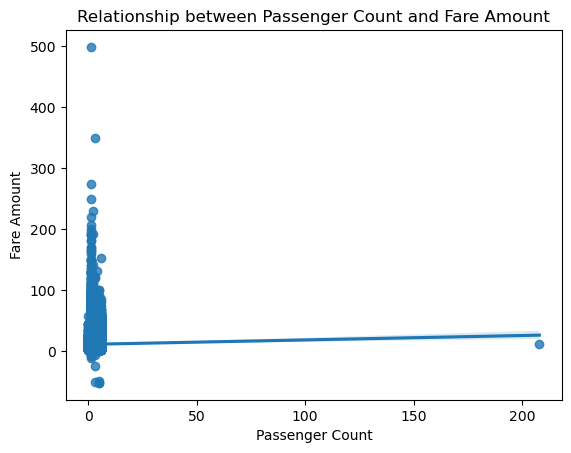

In [10]:
# Scatter plot with regression line
sns.regplot(x='passenger_count', y='fare_amount', data=uber)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.title('Relationship between Passenger Count and Fare Amount')
plt.show()

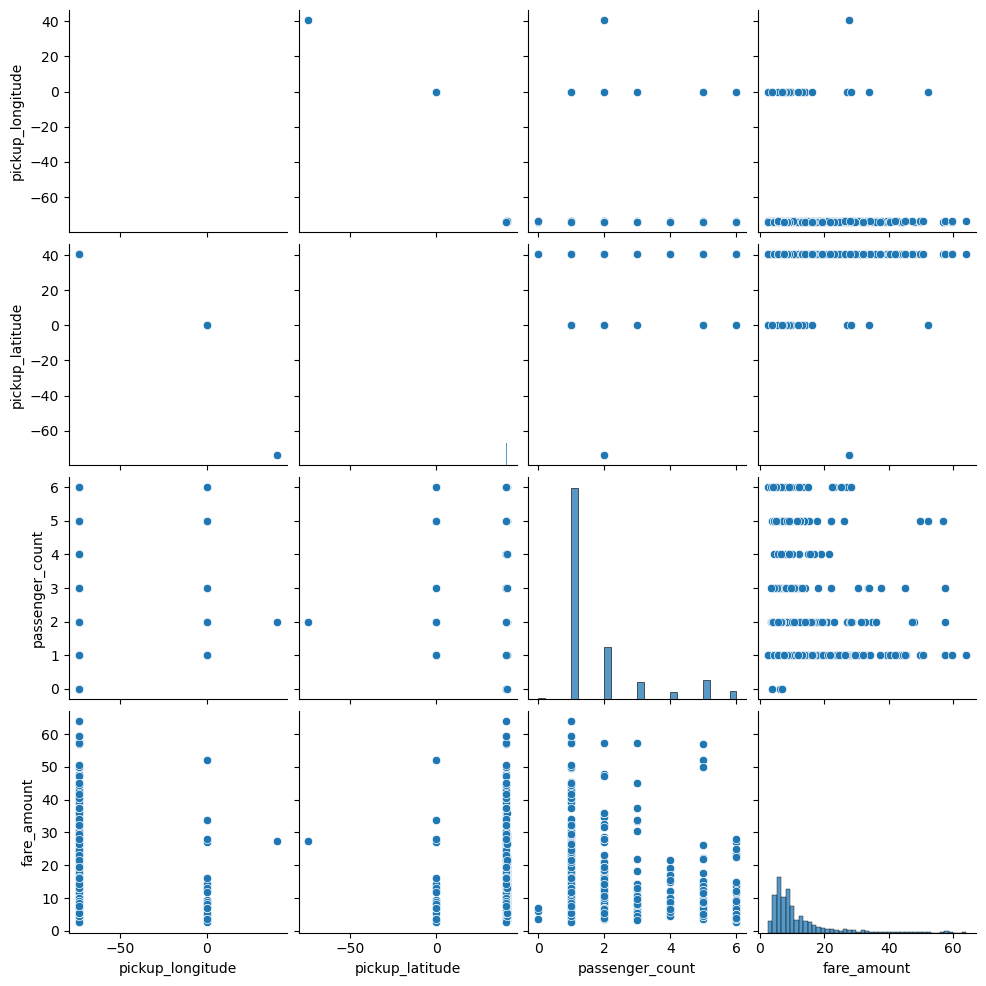

In [11]:
import warnings
warnings.filterwarnings("ignore")
# Sample a subset of the data for faster plotting (optional)
sampled_data = uber.sample(n=1000)  # Adjust the sample size as needed

# Pairplot
sns.pairplot(data=sampled_data, vars=['pickup_longitude', 'pickup_latitude', 'passenger_count', 'fare_amount'])
plt.show()

## Step 3: Feature Engineering
Lets create new features

In [12]:
# Convert 'pickup_datetime' column to datetime data type
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])


In [13]:
# Extract relevant features from datetime column
uber['pickup_hour'] = uber['pickup_datetime'].dt.hour
uber['pickup_dayofweek'] = uber['pickup_datetime'].dt.dayofweek

In [14]:
# Select predictive variables and target variable
X = uber[['pickup_hour', 'pickup_dayofweek', 'pickup_longitude', 'pickup_latitude', 'passenger_count']]
y = uber['fare_amount']

## Step 4:Preparing the data for modelling

### Splitting into train & test

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions on training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
# Evaluate the model
print("Training R^2 score:", r2_score(y_train, y_train_pred))
print("Testing R^2 score:", r2_score(y_test, y_test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))

Training R^2 score: 0.0007059390148672628
Testing R^2 score: 0.000660307260434867
Mean Squared Error: 103.61991454836728


In [23]:
### Residual Analysis

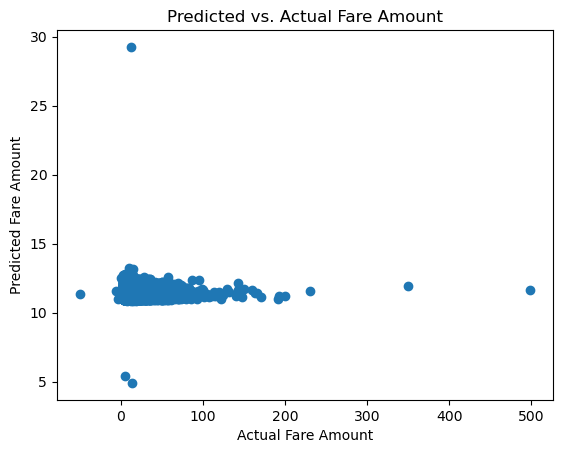

In [24]:
# Plot predictions vs. actual values for the testing set
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Predicted vs. Actual Fare Amount")
plt.show()

<Figure size 640x480 with 0 Axes>

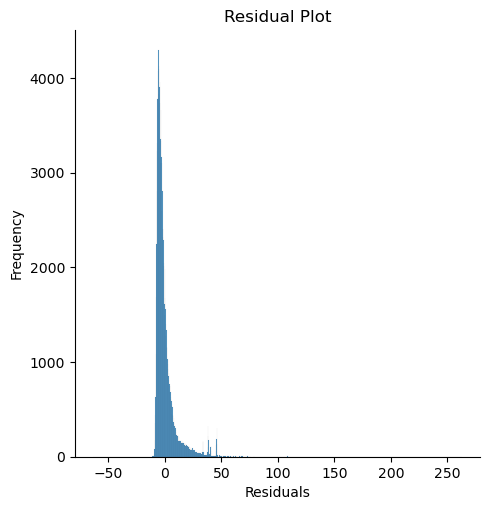

In [25]:
# Residual plot
residuals = y_train - y_train_pred
plt.figure()
sns.displot(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Plot")
plt.show()

## Step 5:Data Scaling / Normalization

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 6:Correlation Analysis

In [28]:
# Drop non-numeric columns
uber_numeric = uber.drop(columns=['pickup_datetime', 'key'])

# Calculate correlation matrix
corr_matrix = uber_numeric.corr()

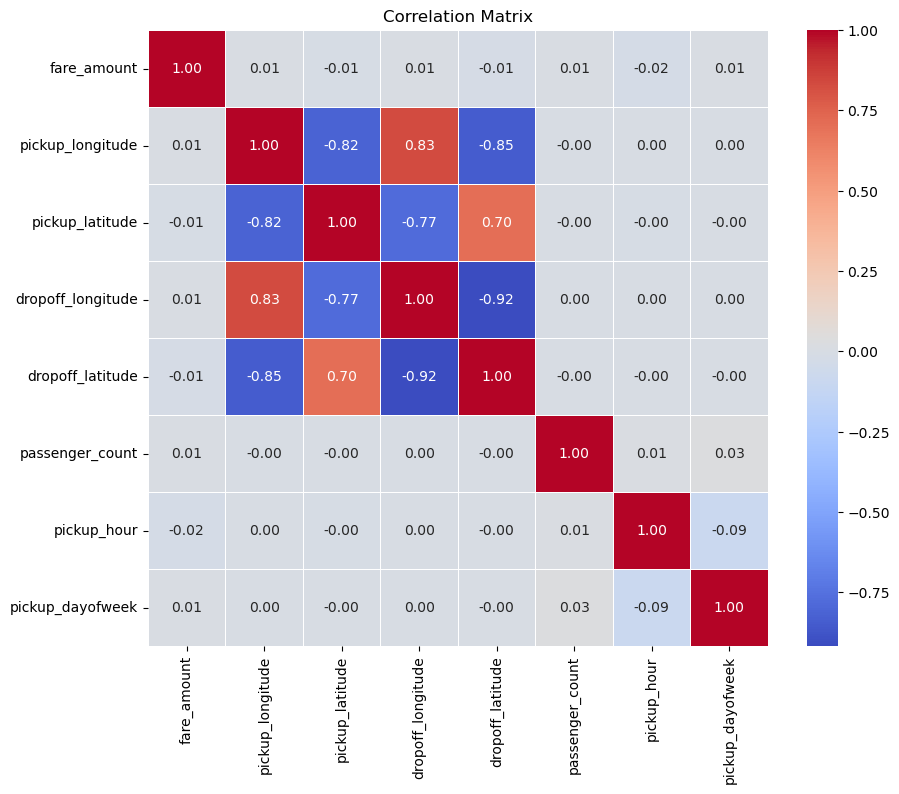

In [29]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()